# All graph for all $M$ near $t_c$

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json
import glob
import scipy.stats as stats
import pandas as pd

In [2]:
sns.set()

In [3]:
data_root = '../data/entropy-order-convolved/'
fig_root="../figures/"
# os.listdir(data_root)

In [4]:
classname="BA_NetworkPercolationExplosive_v7"
signature="{}_N_*_m_10_M_{}_entropy-order_*fast.txt"
m = 10
print(signature)

{}_N_*_m_10_M_{}_entropy-order_*fast.txt


In [5]:
exponents = "BA_explosive_exponents" # exponent filename

### checking ensemble size

In [8]:
print("Ensemble sizes")
for file in files:
    with open(file) as f:
        line=f.readline()
        head=json.loads(line[1:])
        print("N=", head['N'], "  En=", head['En'])

Ensemble sizes


NameError: name 'files' is not defined

## Load data from file

### Plot entropy

In [9]:
def plot_one_entropy(M, ax, i, j):
    """
    plot entropy for provided M values
    """
    files=glob.glob(data_root + signature.format(classname,M))
    for file in files:
        with open(file) as f:
            line=f.readline()
            head=json.loads(line[1:])
            N=int(head['N'])
            M=int(head['M'])
            m=int(head['m'])
        t, H, P = np.loadtxt(file, unpack=True)

        index=np.linspace(0, t.shape[0]-1, 2000, dtype=int)
        ax[i, j].plot(t[index], H[index], label="N={}k".format(N//1000))
    ax[i, j].legend()
    ax[i, j].set_xlim([0.48, 1.2])
    ax[i, j].text(0.8, 13.5, "M={}".format(M))

In [12]:
def plot_near_tc_entropy(M, ax, i, j, tc):
    """
    plot entropy for provided M values
    """
    files=glob.glob(data_root + signature.format(classname,M))
    eps=0.0005
    t1, t2 = tc-eps, tc+eps
    
    for file in files:
        with open(file) as f:
            line=f.readline()
            head=json.loads(line[1:])
            N=int(head['N'])
            M=int(head['M'])
            m=int(head['m'])
        t, H, P = np.loadtxt(file, unpack=True)

        index= (t1 < t) & (t < t2)
        ax[i, j].plot(t[index], H[index], 'o', label="N={}k".format(N//1000), marker=1)
    ax[i, j].legend()
    ax[i, j].set_xlim([t1, t2])
    ax[i, j].text(tc, 4, "M={}".format(M))

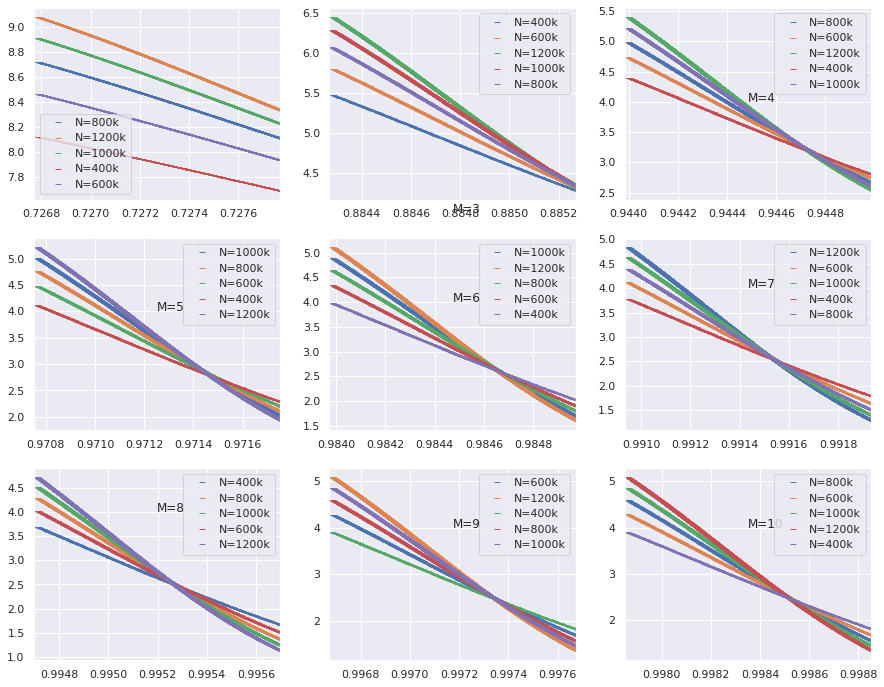

In [13]:
fig, ax=plt.subplots(3,3, figsize=(15, 12))


i, j = 0, 0
for M in range(2, 11):
#     plot_one_entropy(M, ax, i, j)
    
    df = pd.read_csv(exponents)
    df.index = df['M']
    tc = df['tc'][M]
    plot_near_tc_entropy(M, ax, i, j, tc)
    
    j += 1
    if j >= 3:
        j = 0
        i+= 1


filename=fig_root + classname + "_all_entropy-neart_c_m{}".format(m)
plt.savefig(filename)

### Plot Order parameter

In [ ]:
def plot_one_order(M, ax, i, j):
    """
    plot entropy for provided M values
    """
    files=glob.glob(data_root + signature.format(classname,M))
    for file in files:
        with open(file) as f:
            line=f.readline()
            head=json.loads(line[1:])
            N=int(head['N'])
            M=int(head['M'])
            m=int(head['m'])
        t, H, P = np.loadtxt(file, unpack=True)

        index=np.linspace(0, t.shape[0]-1, 2000, dtype=int)
        ax[i, j].plot(t[index], P[index], label="N={}k".format(N//1000))
    ax[i, j].legend()
    ax[i, j].set_xlim([0.6, 1.1])
    ax[i, j].text(0.62, 0.2, "M={}".format(M))

In [10]:
def plot_near_tc_order(M, ax, i, j, tc):
    """
    plot entropy for provided M values
    """
    files=glob.glob(data_root + signature.format(classname,M))
    eps=0.0005
    t1, t2 = tc-eps, tc+eps

    for file in files:
        with open(file) as f:
            line=f.readline()
            head=json.loads(line[1:])
            N=int(head['N'])
            M=int(head['M'])
            m=int(head['m'])
        t, H, P = np.loadtxt(file, unpack=True)
        a = np.max(P)

        index= (t1 < t) & (t < t2)
        ax[i, j].plot(t[index], P[index], 'o', label="N={}k".format(N//1000), marker=1)
    ax[i, j].legend()
    ax[i, j].set_xlim([t1, t2])
    ax[i, j].text(tc, 0.2, "M={}".format(M))

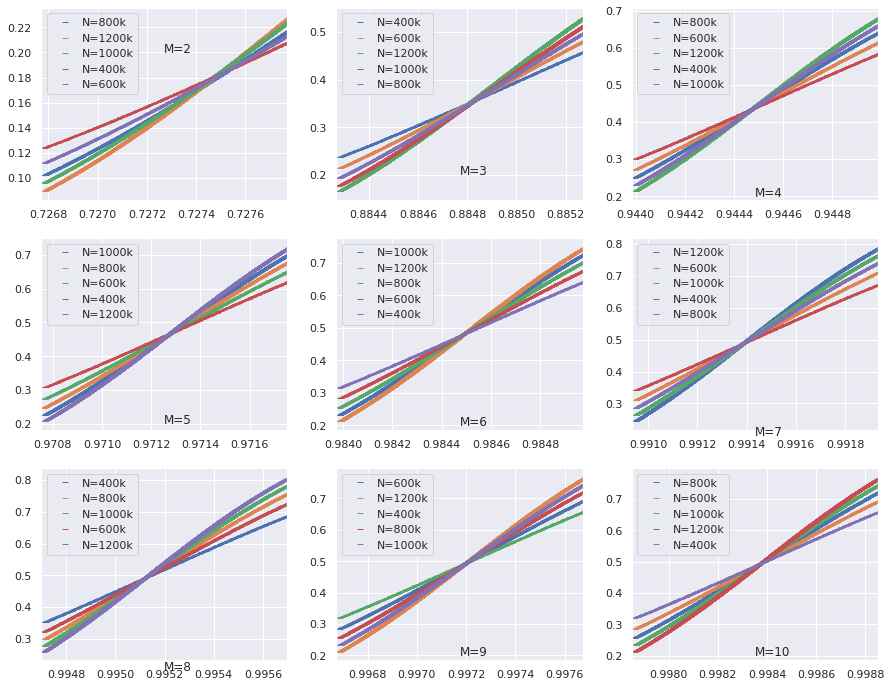

In [11]:
fig, ax=plt.subplots(3,3, figsize=(15, 12))


i, j = 0, 0
for M in range(2, 11):
#     plot_one_order(M, ax, i, j)
    
    df = pd.read_csv(exponents)
    df.index = df['M']
    tc = df['tc'][M]
    plot_near_tc_order(M, ax, i, j, tc)
    
    j += 1
    if j >= 3:
        j = 0
        i+= 1


filename=fig_root + classname + "_all_order-parameter_near_tc_m{}".format(m)
plt.savefig(filename)

### Specific heat

In [2]:
def find_specific_heat(t, H, N):
#     C = -t[1:]*np.diff(H)/np.diff(t)  # noisy data
    C = -(1-t[1:])*np.diff(H)*N
#     print(1/np.diff(t)[0])
    
#     print(np.diff(t)[0])
#     print(np.diff(t)[1234])
#     print(np.diff(t)[-1])
    print(N)
    return C

def find_susceptibility(t, P, N):
    sus=np.diff(P)*N
    return sus

In [26]:
def plot_one_specific_heat(M, ax, i, j, largest):
    """
    plot specific_heat for provided M values for the largest system size
    """
    files=glob.glob(data_root + signature.format(classname,M))
    for file in files:
        with open(file) as f:
            line=f.readline()
            head=json.loads(line[1:])
            N=int(head['N'])
            M=int(head['M'])
            m=int(head['m'])
        if N < largest:
            continue
        t, H, P = np.loadtxt(file, unpack=True)
        C = find_specific_heat(t, H, N)
        
        k = np.argmax(C)
#         print(t.shape)
#         print("max ", k)
        index=np.arange(k-100, k+100, dtype=int)
#         print(index)
        ax[i, j].plot(t[1:][index], C[index], label="N={}k".format(N//1000))
    ax[i, j].legend()
#     ax[i, j].set_xlim([0.48, 1.2])
    ax[i, j].text(t[k], (C[index[-1]] + C[index[0]])/2, "M={}".format(M))

1200000
1200000
1200000
1200000
1200000
1200000
1200000
1200000
1200000


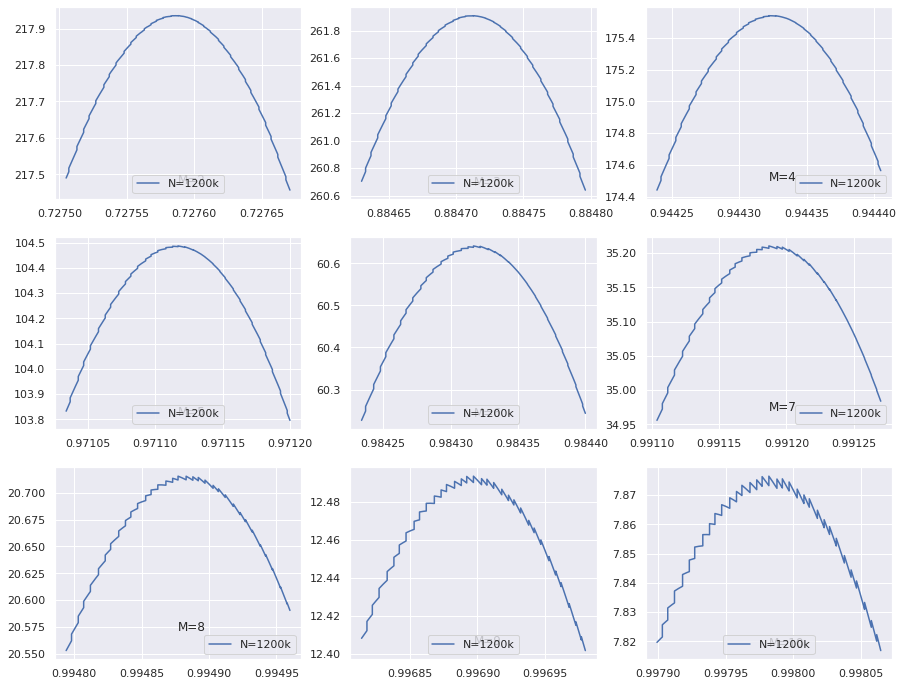

In [27]:
fig, ax=plt.subplots(3,3, figsize=(15, 12))


i, j = 0, 0
for M in range(2, 11):
    plot_one_specific_heat(M, ax, i, j, 1200000)
    
    j += 1
    if j >= 3:
        j = 0
        i+= 1


filename=fig_root + classname + "_all_specific_heat_m{}".format(m)
plt.savefig(filename)

### Susceptibility 

In [28]:
def plot_one_susceptibility(M, ax, i, j, largest):
    """
    plot specific_heat for provided M values for the largest system size
    """
    files=glob.glob(data_root + signature.format(classname,M))
    for file in files:
        with open(file) as f:
            line=f.readline()
            head=json.loads(line[1:])
            N=int(head['N'])
            M=int(head['M'])
            m=int(head['m'])
        if N < largest:
            continue
        t, H, P = np.loadtxt(file, unpack=True)
        X = find_susceptibility(t, P, N)
        
        k = np.argmax(X)
#         print(t.shape)
#         print("max ", k)
        index=np.arange(k-100, k+100, dtype=int)
#         print(index)
        ax[i, j].plot(t[1:][index], X[index], label="N={}k".format(N//1000))
    ax[i, j].legend()
#     ax[i, j].set_xlim([0.48, 1.2])
    ax[i, j].text(t[k], (X[index[-1]] + X[index[0]])/2, "M={}".format(M))

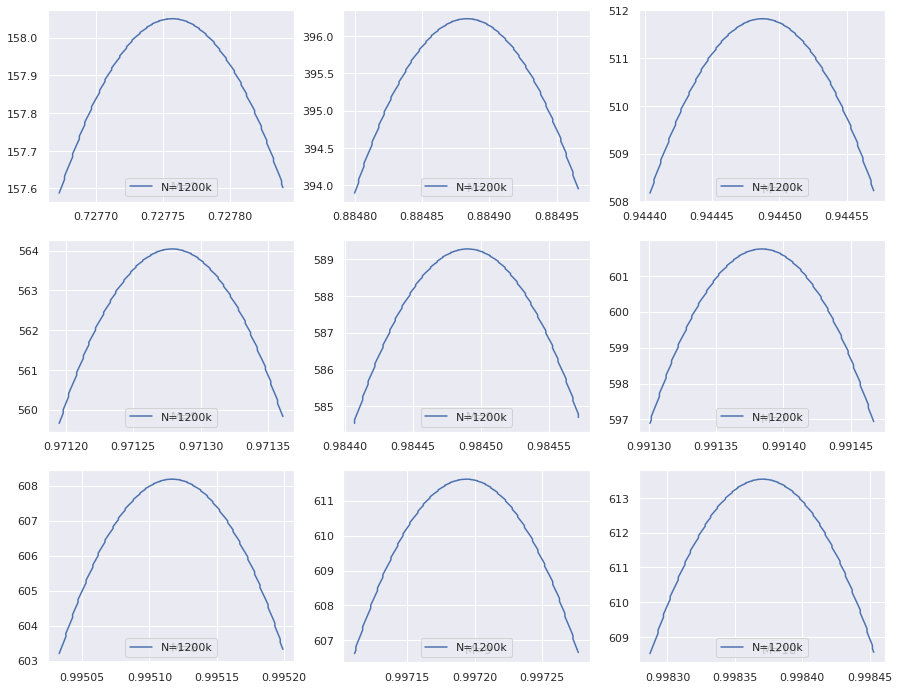

In [29]:
fig, ax=plt.subplots(3,3, figsize=(15, 12))


i, j = 0, 0
for M in range(2, 11):
    plot_one_susceptibility(M, ax, i, j, 1200000)
    
    j += 1
    if j >= 3:
        j = 0
        i+= 1


filename=fig_root + classname + "_all_susceptibility_m{}".format(m)
plt.savefig(filename)